# Your Title Here

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [26]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go


import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Step 1: Introduction

In this project, I investigate a comprehensive dataset published by Purdue University that catalogued power outages across the United States, along with a suite of external variables recorded for each outage. These additional features include geographical location of the outages, regional climate classifications, land-use characteristics, electricity consumption patterns and economic characteristics of the states affected by the outages. 

Initially, I needed to clean the data and perform an initial foray into analyzing the dataset. It contains over 1500 rows, with some more niche columns –– for example, HURRICANE_NAME –– being largely null. As a result, I first needed to sanitize, organize and normalize the dataset. 

Then, I explored a univariate analysis, focusing on three different variables in three different studies. These were: THREE VARIABLES. My hypotheses for these three variables were as follows: HYPOTHESES.

Next, I wanted to dive deeper into a bivariate analysis, leveraging combined and related features to better understand patterns in the dataset, and thus build a better predictive model. 

## Step 2: Data Cleaning and Exploratory Data Analysis

In [20]:
# first, need to import data and re-factor the excel dataset to be properly represented in a DataFrame
def import_data():
    df = pd.read_excel('outage.xlsx', skiprows=4)
    df.columns = df.iloc[0]
    df = df.drop(0)
    df = df.reset_index(drop=True)
    units = df.iloc[0].dropna().to_dict()
    df = df.drop(0)

    return units, df

In [21]:
units, df = import_data()

In [22]:
df

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
2,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
3,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
4,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
5,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.592666,8.407334,5.478743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.599649,2.401765,2.401765
1531,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.599649,2.401765,2.401765
1532,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.307744,1.692256,1.692256
1533,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.307744,1.692256,1.692256


## Univariate Anaylsis

### Analysis 1) Outage Start Time vs. Outage Duration

In [23]:
outage_start_time = df["OUTAGE.START.TIME"]
outage_duration = df["OUTAGE.DURATION"]

In [24]:
outage_duration

1       3060
2          1
3       3000
4       2550
5       1740
        ... 
1530     720
1531     NaN
1532      59
1533     181
1534     NaN
Name: OUTAGE.DURATION, Length: 1534, dtype: object

In [25]:
outage_start_time

1       17:00:00
2       18:38:00
3       20:00:00
4       04:30:00
5       02:00:00
          ...   
1530    08:00:00
1531         NaN
1532    22:54:00
1533    11:00:00
1534         NaN
Name: OUTAGE.START.TIME, Length: 1534, dtype: object

/var/folders/3r/h9skfdh12kg2nztqjg7tdhj80000gn/T/ipykernel_55102/59536566.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



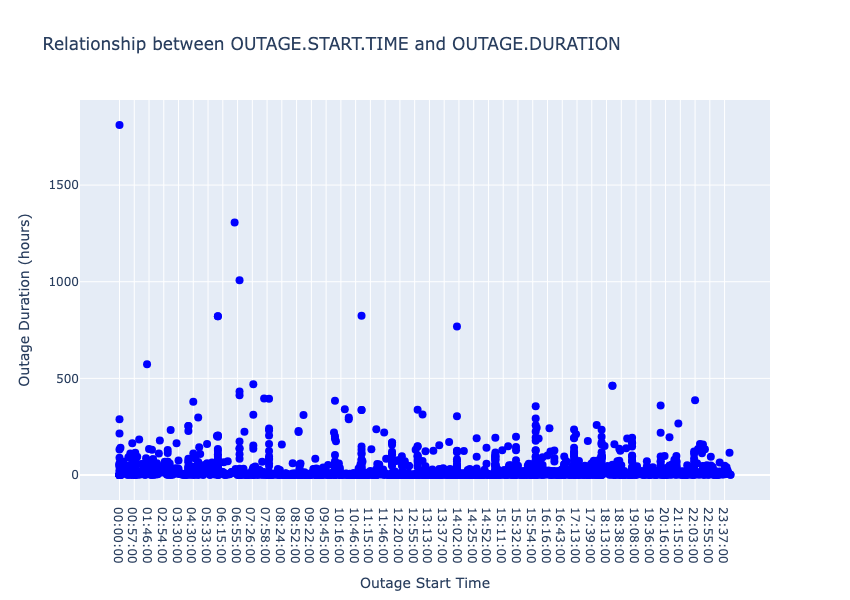

In [35]:
df_extracted = df[['OUTAGE.START.TIME', 'OUTAGE.DURATION']]
df_extracted['OUTAGE.DURATION'] = df_extracted['OUTAGE.DURATION'] / 60
df_sorted = df_extracted.sort_values(by='OUTAGE.START.TIME')

fig = go.Figure()

# Add scatter plot to the figure
fig.add_trace(go.Scatter(
    x=df_sorted['OUTAGE.START.TIME'], 
    y=df_sorted['OUTAGE.DURATION'], 
    mode='markers', 
    marker=dict(color='blue', size=8),
    name='Power Outages'
))

# Add titles and labels
fig.update_layout(
    title='Relationship between OUTAGE.START.TIME and OUTAGE.DURATION',
    xaxis_title='Outage Start Time',
    yaxis_title='Outage Duration (hours)',
    template='plotly',
    height=600,
    width=800
)

# Show the interactive plot
fig.show()

## Bivariate Analysis

## Step 3: Framing a Prediction Problem

In [ ]:
# TODO

## Step 4: Baseline Model

In [ ]:
# TODO

## Step 5: Final Model

In [ ]:
# TODO